<a href="https://colab.research.google.com/github/artkuo/AzureNotebooks/blob/master/kuo-courses/bmen-f22/MultivariateLinearRegressionPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression with Pytorch

A demonstration of optimization using stochastic gradient descent with Pytorch.

We start by creating some data to train with.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

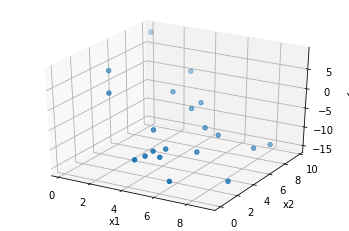

In [71]:
n = 20 # how many samples
m = 2  # how many dimensions of x
x = np.random.uniform(low=0, high=10, size=(n,m))  # draw some random samples of x

x_train = np.array(x, dtype=np.float32) # float32 customary in ML big data
c1 = -2   # coefficient of 1st row of x          # to make it random: np.random.randn()
c2 =  1   # coefficient of 2nd row of x             
c3 = -0.5 # bias
y_train = c1*x_train[:,0] + c2*x_train[:,1] + c3
y_train = np.array(y_train, dtype=np.float32)

plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(x_train[:,0], x_train[:,1], y_train)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("Y")
plt.show()

# Regression using Pytorch as a math library with differentiation

(tensor([[-0.6709,  0.1517]]), tensor([-4.5861]))

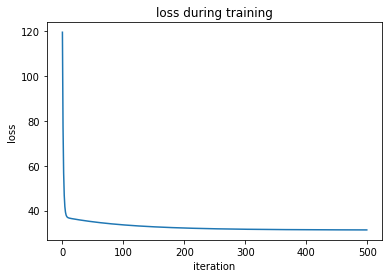

In [73]:
import torch
import torch.nn as nn
from torch.autograd import Variable

def forward(x):                      # forward pass: use model to predict outputs
  return w*x + b

def criterion(yhat,y):                    # mean square error
  return torch.mean((yhat-y)**2)

LOSS = []
lr = 0.01
w = torch.randn((1, 2), requires_grad=True) # data parameters with initial guess
b = torch.randn(1, requires_grad=True)
x_traint = torch.tensor(x_train) # convert to pytorch tensors
y_traint = torch.tensor(y_train.reshape(n, 1))

def train_model(iter):
    
    # Loop
    for epoch in range(iter):
        
        # make a prediction w*x+b
        Yhat = forward(x_traint)  # call the prediction Yhat, or hypothesis
        
        # calculate the loss, where criterion is mean-square error (see above)
        loss = criterion(Yhat, y_traint)
            
        # store the loss in the list LOSS
        LOSS.append(loss.detach()) # detach lets Python deal w/ Pytorch tensors
        
        # backward pass, find gradient of loss wrt parameters
        loss.backward() # back-propagation for gradients
        
        # Gradient descent: update parameters slope and bias
        w.data = w.data - lr * w.grad.data # w.grad.data is the gradient of loss with respect to w
        b.data = b.data - lr * b.grad.data # gradient of loss with respect to b
        
        # zero the gradients before running the backward pass again
        w.grad.data.zero_()
        b.grad.data.zero_()

train_model(500)
plt.plot(LOSS)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.title("loss during training")
w.detach(), b.detach()

## Regression using Pytorch neural network class

Here we use the built-in facilities to define a linear neural network. Linear regression is a very simple, 1-layer network.
Pytorch will also perform stochastic gradient descent steps.

In [74]:
class LinearRegressionModel(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegressionModel, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim) # one layer

  def forward(self, x):
    predict_y = self.linear(x)
    return predict_y

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([20])) that is different to the input size (torch.Size([20, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Text(0.5, 1.0, 'loss during training')

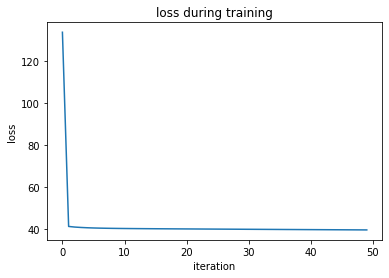

In [75]:
# make an instance of that class
input_dim = 2
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)
criterion = nn.MSELoss() # mean square error as loss function

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

inputs = Variable(torch.from_numpy(x_train))
labels = Variable(torch.from_numpy(y_train))

epochs = 50
LOSS = []
for epoch in range(epochs):
  optimizer.zero_grad() # zero out each step, don't accumulate gradients
  predict_y = model(inputs)
  loss = criterion(predict_y, labels)
  loss.backward()       # back-propagate loss to get gradients wrt parameters
  optimizer.step()      # take an optimization step

  LOSS.append(loss.detach())
  # print('epoch {}, loss {}'.format(epoch + 1, loss.item()))

plt.plot(LOSS)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.title("loss during training")


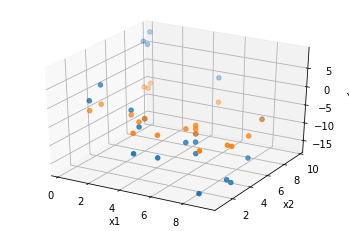

In [67]:
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
# Plot the data and the predictions in a 3D scatter plot
plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(x_train[:,0], x_train[:,1], y_train)
ax.scatter3D(x_train[:,0], x_train[:,1], predicted)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("Y")
plt.show()